11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


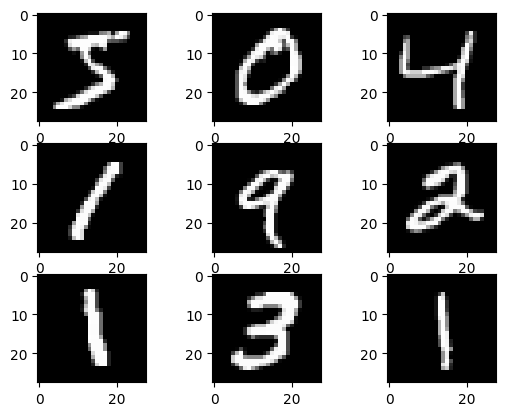

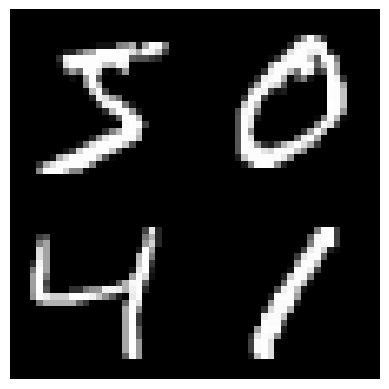

In [3]:
#@title Data loading, structuring
from keras.datasets import mnist

#loading the dataset
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_Y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_Y.shape))

#------------------------------------------------------------

from matplotlib import pyplot

for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

#------------------------------------------------------------

import numpy as np

def Concatenate(imageSeq):
  result = []
  iter = (len(imageSeq)//4)
  for i in range(0, iter):
    top_concatenated = np.concatenate(imageSeq[4*i:2+4*i], axis=1)
    bottom_concatenated = np.concatenate(imageSeq[2+4*i:4+4*i], axis=1)
    concatenated_image = np.concatenate([top_concatenated, bottom_concatenated], axis=0)
    result.append(concatenated_image)
  return result

def OneHotEncoding(numSeq):
  finalRes = []
  result = [0,0,0,0,0,0,0,0,0,0,   0,0,0,0,0,0,0,0,0,0,   0,0,0,0,0,0,0,0,0,0,   0,0,0,0,0,0,0,0,0,0]
  for i in range(0, len(numSeq)):
    if((i+1)%4!=0):
      result[10 * (i%4) + numSeq[i]] = 1
    else:
      result[30 + numSeq[i]] = 1
      finalRes.append(result)
      result = [0,0,0,0,0,0,0,0,0,0,   0,0,0,0,0,0,0,0,0,0,   0,0,0,0,0,0,0,0,0,0,   0,0,0,0,0,0,0,0,0,0]
  return finalRes

train_i=Concatenate(train_X)
train_o=OneHotEncoding(train_Y)
test_i=Concatenate(test_X)
test_o=OneHotEncoding(test_Y)

pyplot.imshow(train_i[0], cmap='gray')
pyplot.axis('off')
pyplot.show()

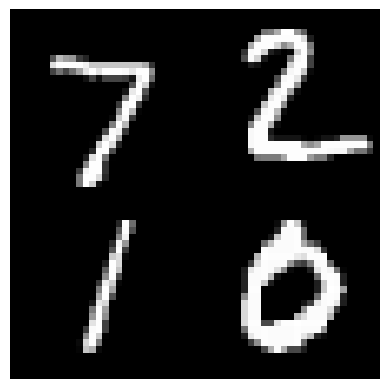

In [ ]:
pyplot.imshow(test_i[0], cmap='gray')
pyplot.axis('off')
pyplot.show()

In [4]:
#@title Data normalization

print(train_i[3][14])

for i in range(0, len(train_i)):
  train_i[i] = train_i[i] / 255
for i in range(0, len(test_i)):
  test_i[i] = test_i[i] / 255

train_i = np.array(train_i)
train_o = np.array(train_o)
test_i = np.array(test_i)
test_o = np.array(test_o)

print(train_i[3][14])

print(train_i.shape)
print(train_o.shape)
print(test_i.shape)
print(test_o.shape)

[  0   0   0   0   0   0   0   0   0   0  58 181 234 254 254 254 254 254
 254 252 140  22   0   0   0   0   0   0   0   0   0   0   0   0   0  13
 109 252 228 130   0  38 165 253 233 164  49  63 253 214  31   0   0   0
   0   0]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.22745098 0.70980392
 0.91764706 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843
 0.99607843 0.98823529 0.54901961 0.08627451 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05098039
 0.42745098 0.98823529 0.89411765 0.50980392 0.         0.14901961
 0.64705882 0.99215686 0.91372549 0.64313725 0.19215686 0.24705882
 0.99215686 0.83921569 0.12156863 0.         0.         0.
 0.         0.        ]
(15000, 56, 56)
(15000, 40)
(2500, 56, 56)
(2500, 40)


In [ ]:
#@title Model construction
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

model = keras.Sequential([
    Conv2D(8, kernel_size=(5, 5), padding='same', input_shape=(56, 56, 1), activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    #Dropout(0.25),
    
    Conv2D(16, kernel_size=(5, 5), padding='same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    #Dropout(0.25),
    
    Flatten(),
    Dense(32, activation=tf.nn.sigmoid),
    Dense(32, activation=tf.nn.sigmoid),
    #Dropout(0.25),
    Dense(40, activation=tf.nn.sigmoid)
])
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 56, 56, 8)         208       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        3216      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 32)               

In [ ]:
model = keras.models.load_model('final.model')

OSError: ignored

In [ ]:
#@title Model training - first half of testset will be used for validation dataset
model.compile(loss=keras.losses.mse, optimizer='adam', metrics=['accuracy'])
history = model.fit(train_i, train_o, epochs=50, validation_data=(test_i[0:1250], test_o[0:1250]))

Epoch 1/50
469/469 [==============================] - 32s 66ms/step - loss: 0.1050 - accuracy: 0.0529 - val_loss: 0.0900 - val_accuracy: 0.0000e+00
Epoch 2/50
469/469 [==============================] - 32s 67ms/step - loss: 0.0899 - accuracy: 0.0388 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 3/50
469/469 [==============================] - 33s 69ms/step - loss: 0.0897 - accuracy: 0.0307 - val_loss: 0.0896 - val_accuracy: 0.0000e+00
Epoch 4/50
469/469 [==============================] - 30s 65ms/step - loss: 0.0892 - accuracy: 9.3333e-04 - val_loss: 0.0889 - val_accuracy: 8.0000e-04
Epoch 5/50
469/469 [==============================] - 32s 67ms/step - loss: 0.0873 - accuracy: 0.0019 - val_loss: 0.0858 - val_accuracy: 0.0000e+00
Epoch 6/50
469/469 [==============================] - 31s 66ms/step - loss: 0.0785 - accuracy: 6.6667e-05 - val_loss: 0.0748 - val_accuracy: 0.0000e+00
Epoch 7/50
469/469 [==============================] - 31s 65ms/step - loss: 0.0666 - accuracy: 0.0000e+0

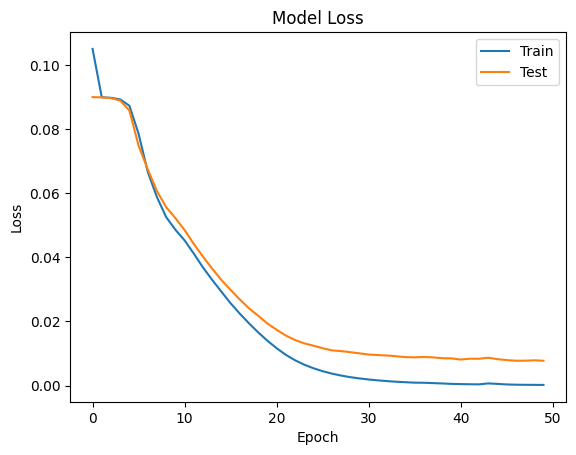

79/79 [==============================] - 2s 21ms/step - loss: 0.0057 - accuracy: 0.2208
Final Total loss :  0.005654845852404833
469/469 [==============================] - 17s 35ms/step
Final Total train accuracy :  99.945 %
40/40 [==============================] - 1s 17ms/step
Final Total test accuracy :  98.02 %


In [ ]:
#@title Model evaluation - since we're not using internal function from keras, accuracy is calculated in manual way, second half of testset will be used for evaluating model performance
def plt_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
plt_loss(history)
plt.show()
data = model.evaluate(test_i, test_o)
print("Final Total loss : ", str(data[0]))


#Calculating accuracy of trainset
pred = model.predict(train_i)
result=[]
for z in range(0, len(pred)):
  res2=[]
  for i in range(0, 4):
    res = pred[z][0+i*10:10+i*10]
    highest=0
    for k in range(0, 10):
      if(res[highest] <= res[k]):
        highest = k
    res2.append(highest)
  result += res2

rc=0
for i in range(0, len(result)):
  if(result[i] == train_Y[i]):
    rc += 1
print("Final Total train accuracy : ", rc/len(result)*100, "%")


#Calculating accuracy of testset
pred = model.predict(test_i[1250:2500])
result=[]
for z in range(0, len(pred)):
  res2=[]
  for i in range(0, 4):
    res = pred[z][0+i*10:10+i*10]
    highest=0
    for k in range(0, 10):
      if(res[highest] <= res[k]):
        highest = k
    res2.append(highest)
  result += res2

rc=0
for i in range(0, len(result)):
  if(result[i] == test_Y[i+5000]):
    rc += 1
print("Final Total test accuracy : ", rc/len(result)*100, "%")

In [ ]:
#@title To save model in local environment
model.save("final.model")

In [ ]:
!zip -r /content/final.model.zip /content/final.model

  adding: content/final.model/ (stored 0%)
  adding: content/final.model/assets/ (stored 0%)
  adding: content/final.model/fingerprint.pb (stored 0%)
  adding: content/final.model/keras_metadata.pb (deflated 91%)
  adding: content/final.model/variables/ (stored 0%)
  adding: content/final.model/variables/variables.index (deflated 63%)
  adding: content/final.model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/final.model/saved_model.pb (deflated 88%)


In [1]:
#@title [External]-Model Load and test, final.model.zip file must be located in /content directory
!unzip -qq /content/final.model.zip

In [2]:
#@title [External]-Model Load and test, final.model folder should be in /content directory
from tensorflow import keras
model = keras.models.load_model('final.model')

Put Index of testset image to predict : 1


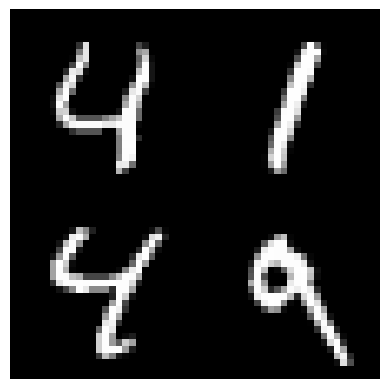

1/1 [==============================] - 0s 237ms/step
Predicted result :  [[4, 1, 4, 6]]


In [5]:
#@title [External]-Model test - Data must be loaded and normalized by running codes from previous code block (block 1 and block 3)
model = keras.models.load_model('final.model')

def Predict(test):
  pred = model.predict(test)
  r=[]
  for z in range(0, len(pred)):
    res2=[]
    for i in range(0, 4):
      res = pred[z][0+i*10:10+i*10]
      highest=0
      for k in range(0, 10):
        if(res[highest] <= res[k]):
          highest = k
      res2.append(highest)
    r.append(res2)
  return r

x=int(input("Put Index of testset image to predict : "))
pyplot.imshow(test_i[x], cmap='gray')
pyplot.axis('off')
pyplot.show()
result = Predict(test_i[x:x+1])
print("Predicted result : ", result)

In [6]:
#@title [External]-Model Evaluation
data = model.evaluate(test_i, test_o)
print("Final Total loss : ", str(data[0]))


#Calculating accuracy of trainset
pred = model.predict(train_i)
result=[]
for z in range(0, len(pred)):
  res2=[]
  for i in range(0, 4):
    res = pred[z][0+i*10:10+i*10]
    highest=0
    for k in range(0, 10):
      if(res[highest] <= res[k]):
        highest = k
    res2.append(highest)
  result += res2

rc=0
for i in range(0, len(result)):
  if(result[i] == train_Y[i]):
    rc += 1
print("Final Total train accuracy : ", rc/len(result)*100, "%")


#Calculating accuracy of testset
pred = model.predict(test_i[1250:2500])
result=[]
for z in range(0, len(pred)):
  res2=[]
  for i in range(0, 4):
    res = pred[z][0+i*10:10+i*10]
    highest=0
    for k in range(0, 10):
      if(res[highest] <= res[k]):
        highest = k
    res2.append(highest)
  result += res2

rc=0
for i in range(0, len(result)):
  if(result[i] == test_Y[i+5000]):
    rc += 1
print("Final Total test accuracy : ", rc/len(result)*100, "%")

79/79 [==============================] - 2s 20ms/step - loss: 0.0057 - accuracy: 0.2208
Final Total loss :  0.005654845852404833
469/469 [==============================] - 9s 19ms/step
Final Total train accuracy :  99.945 %
40/40 [==============================] - 1s 17ms/step
Final Total test accuracy :  98.02 %
